# Plateau analysis

This file builds upon plot.ipynb, delving deeper into the plateaus found in some of the loglike iver time analysis


In [214]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [444]:
basefilepath = "resultsfiles/facebookCircles_G_"

In [445]:
## read in the files

with open(basefilepath + "configs.txt", "r") as file:
    lines = file.readlines()

with open(basefilepath + "num_groups.txt", "r") as num_groups_file:
    num_groups_list = list(map(int, num_groups_file.readlines()))

with open(basefilepath + "pairs.txt", "r") as pfile: # pairs
    pairs_lines = pfile.readlines()

with open(basefilepath + "ll.txt", "r") as ll_file:
    ll_list = list(map(float, ll_file.readlines()))

log_likelihood_values = np.loadtxt(basefilepath + "ll.txt")

min loglike: -350867.0
max loglike: -319062.0
mean loglike: -339606.4424944688
stdev of loglike: 8391.58657417093


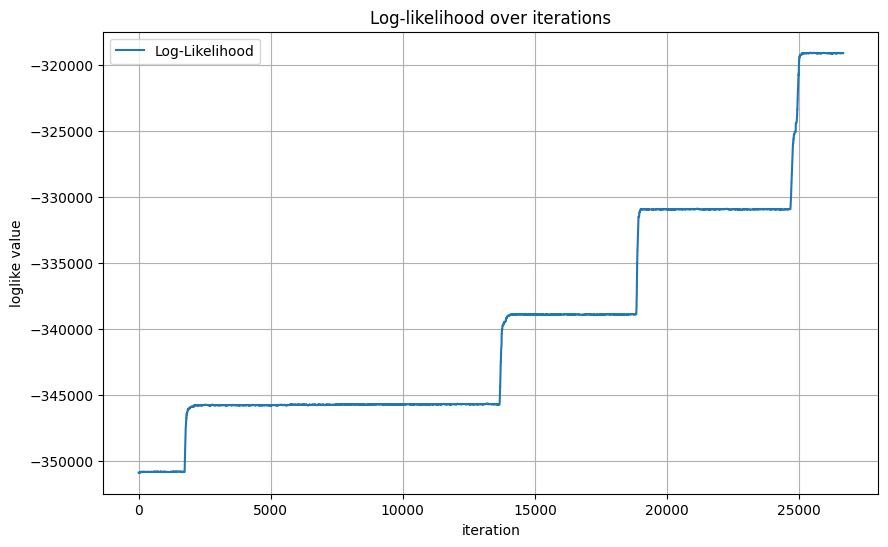

In [446]:
#statistics
print("min loglike:", np.min(log_likelihood_values))
print("max loglike:", np.max(log_likelihood_values))
print("mean loglike:", np.mean(log_likelihood_values))
print("stdev of loglike:", np.std(log_likelihood_values))

# Plotting log-likelihood values over iterations
plt.figure(figsize=(10, 6))
plt.plot(log_likelihood_values, label="Log-Likelihood")
plt.title("Log-likelihood over iterations")
#plt.axis([None, None, None, -1000])
plt.xlabel("iteration")
plt.ylabel("loglike value")
plt.legend()
plt.grid(visible = True, which = 'both')
plt.show()

In [396]:
## buffer the lines with 0s from the left
## save highest groups, and total group configurations
def find_highest_groups(inputConfigs, inputNumGroups):
    binary_lines = []
    highest_groups = []
    for line, numgroups in zip(inputConfigs, inputNumGroups): ## iterate through the graph configurations
        
        #group_ass_dict = {}
        group_structure = ""
        highest_group_dict = {}

        for i, node in enumerate(line.split()):         ## iterate through the node group assignments
            unbuffered_bin = bin(int(node))[2:]

            highest_group_dict[i] = len(unbuffered_bin) - 1     ## assign the highest order group

            while len(unbuffered_bin) < numgroups:
                unbuffered_bin = '0' + unbuffered_bin
            #group_ass_dict[i] = unbuffered_bin[::-1]
            #group_structure = group_structure + " " + unbuffered_bin
            group_structure = group_structure + unbuffered_bin      ## to check similarity of lines

        highest_groups.append(highest_group_dict)
        binary_lines.append(group_structure)

    return highest_groups,binary_lines



In [449]:
startplat5 = 20000
endplat5 = 24000

plat5_max_ll = np.max(ll_list[startplat5:endplat5])
print(plat5_max_ll)
plat5_std_ll = np.std(ll_list[startplat5:endplat5])

plat5_structures = {}

for i in range(startplat4,endplat4):
    if plat5_max_ll - 1/2 * plat5_std_ll <= ll_list[i] :
        plat5tempstructure = lines[i].strip()
        plat5temppairs = pairs_lines[i].strip()  # Assuming pairs_lines contains values from clique_cp_pairs.txt
        plat5_structures[plat5tempstructure] = plat5temppairs

plat5_structure_index = np.argsort(log_likelihood_values[startplat5:endplat5])[-1]

plat5_structure = lines[plat5_structure_index]
plat5_highest_groups, plat5_binary_lines = find_highest_groups([lines[plat5_structure_index]],[num_groups_list[plat5_structure_index]])


-330877.0


In [454]:
plat5_highest_groups, plat5_binary_lines = find_highest_groups([lines[plat5_structure_index]],[9])
plat4_highest_groups, plat4_binary_lines = find_highest_groups([lines[np.argsort(log_likelihood_values[startplat4:endplat4])[-1]]],[9])

In [455]:
metrics.jaccard_score(plat5_binary_lines,plat4_binary_lines, average = 'micro')

0.0

In [453]:
startplat4 = 25000
endplat4 = 26667

plat4_max_ll = np.max(ll_list[startplat4:endplat4])
plat4_std_ll = np.std(ll_list[startplat4:endplat4])


## finding those structures within 1/2 std deviation of the maximum loglike
plat4_structures = {}

for i in range(startplat4,endplat4):
    if plat4_max_ll - 1/2 * plat4_std_ll <= ll_list[i] :
        plat4tempstructure = lines[i].strip()
        plat4temppairs = pairs_lines[i].strip()  # Assuming pairs_lines contains values from clique_cp_pairs.txt
        plat4_structures[i] = [plat4tempstructure, plat4temppairs]
        #plat4_structures.add(plat4tempstructure)


plat4_max_structure_index = np.argsort(log_likelihood_values[startplat4:endplat4])[-1]
plat4_max_structure = lines[plat4_max_structure_index]


plat4_fhg_input_lines = [lines[plat4_max_structure_index]]
for i in plat4_structures.keys():
    plat4_fhg_input_lines.append(lines[i])

plat4_fhg_input_numGroups = [14]
for i in plat4_structures.keys():
    plat4_fhg_input_numGroups.append(14)

plat4_highest_groups, plat4_binary_lines = find_highest_groups(plat4_fhg_input_lines,plat4_fhg_input_numGroups)

## compare the structures with the top loglike values
for i in range(0,1):
    for j in range(i + 1, len(plat4_binary_lines)):
        listi = list(map(int,list(plat4_binary_lines[i])))
        listj = list(map(int,list(plat4_binary_lines[j])))
        if len(listi)== len(listj):
            similarity = metrics.jaccard_score(listi,listj,average = 'micro')
            groupdisti = list(plat4_highest_groups[i].values())
            groupdistj = list(plat4_highest_groups[j].values())
            js_groupdist = metrics.jaccard_score(groupdisti,groupdistj,average = 'micro')
            
            if (similarity < 85):
                print(round(similarity,4), round(js_groupdist,4), i, j)
        #else:
            #print(i,j, len(listi)-len(listj))

0.9323 0.4833 0 1
0.9322 0.4825 0 2
0.9322 0.4822 0 3
0.9322 0.4825 0 4
0.9323 0.4827 0 5
0.9323 0.483 0 6
0.9322 0.4819 0 7
0.9324 0.4836 0 8
0.9323 0.4827 0 9
0.9323 0.4833 0 10
0.9324 0.4838 0 11
0.9324 0.4841 0 12
0.9324 0.4841 0 13
0.9324 0.4836 0 14
0.9323 0.4827 0 15
0.9324 0.4836 0 16
0.9324 0.4838 0 17
0.9322 0.4822 0 18
0.9322 0.4822 0 19
0.9322 0.4825 0 20
0.9322 0.4822 0 21
0.9322 0.4822 0 22
0.9323 0.4827 0 23
0.9324 0.4833 0 24
0.9324 0.4833 0 25
0.9324 0.4838 0 26
0.9325 0.4847 0 27
0.9325 0.4841 0 28
0.9324 0.4838 0 29
0.9324 0.4833 0 30
0.9323 0.483 0 31
0.9323 0.483 0 32
0.9324 0.4833 0 33
0.9322 0.4822 0 34
0.9322 0.4819 0 35
0.9321 0.4817 0 36
0.9321 0.4817 0 37
0.932 0.4808 0 38
0.9321 0.4814 0 39
0.9321 0.4817 0 40
0.9322 0.4822 0 41
0.9322 0.4819 0 42
0.9321 0.4817 0 43
0.9321 0.4811 0 44
0.9321 0.4814 0 45
0.9321 0.4817 0 46
0.9321 0.4817 0 47
0.9321 0.4819 0 48
0.9322 0.4822 0 49
0.9322 0.4822 0 50
0.9321 0.4814 0 51
0.9321 0.4811 0 52
0.9321 0.4814 0 53
0.9321

KeyboardInterrupt: 

In [436]:
startplat3 = 0
endplat3 = 1000

plat3_max_ll = np.max(ll_list[startplat3:endplat3])
plat3_std_ll = np.std(ll_list[startplat3:endplat3])

plat3_structure_index = np.argsort(log_likelihood_values[startplat3:endplat3])[-1]

plat3_structure = lines[plat3_structure_index]
plat3_highest_groups, plat3_binary_lines = find_highest_groups([lines[plat3_structure_index]],[num_groups_list[plat3_structure_index]])

In [443]:
## save to csv file
import csv

export_dict = plat4_highest_groups[0]
label = "1997-max"

with open('1997-max.csv', 'w') as f:
    f.write("%s, %s\n" % ("Id",label))
    for key in export_dict.keys():
        f.write("%s, %s\n" % (key, export_dict[key]))